In [1]:
# Imports:|
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from prepare import telco_prep
from explore import chi2_internet_service

In [2]:
# acquiring, preparing the data
# splitting data into train, validate, and test
df = telco_prep()
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,internet_service_type,online_security,...,streaming_tv,streaming_movies,contract,contract_type,payment_method,payment_type,paperless_billing,monthly_charges,total_charges,churn
0,Female,No,Yes,Yes,9,Yes,No,Yes,DSL,No,...,No,No,Yes,One year,Mailed check,Manual,Yes,65.6,593.30,No
1,Male,No,No,No,9,Yes,Yes,Yes,DSL,No,...,No,No,No,Month-to-month,Mailed check,Manual,No,59.9,542.40,No
2,Male,No,No,No,4,Yes,No,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Electronic check,Manual,Yes,73.9,280.85,Yes
3,Male,Yes,Yes,No,13,Yes,No,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Electronic check,Manual,Yes,98.0,1237.85,Yes
4,Female,Yes,Yes,No,3,Yes,No,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Mailed check,Manual,Yes,83.9,267.40,Yes


In [32]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'internet_service_type', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'contract_type', 'payment_method', 'payment_type',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [34]:
# We assign the list of column names to a variable. Lets removed columns that hold numerical values. 
columns_to_check = ['gender', 'senior_citizen', 'partner', 'dependents',
       'phone_service', 'multiple_lines', 'internet_service',
       'internet_service_type', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'contract_type', 'payment_method', 'payment_type',
       'paperless_billing', 'churn']

# Calculate the maximum column name length for formatting
max_col_length = max(len(column) for column in columns_to_check)

# Loop through the columns and print unique values with aligned columns
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"{column.ljust(max_col_length)}  {unique_values}")

gender                 ['Female' 'Male']
senior_citizen         ['No' 'Yes']
partner                ['Yes' 'No']
dependents             ['Yes' 'No']
phone_service          ['Yes' 'No']
multiple_lines         ['No' 'Yes']
internet_service       ['Yes' 'No']
internet_service_type  ['DSL' 'Fiber optic' 'No internet service']
online_security        ['No' 'Yes']
online_backup          ['No' 'Yes']
device_protection      ['No' 'Yes']
tech_support           ['No' 'Yes']
streaming_tv           ['No' 'Yes']
streaming_movies       ['No' 'Yes']
contract               ['Yes' 'No']
contract_type          ['One year' 'Month-to-month' 'Two year']
payment_method         ['Mailed check' 'Electronic check' 'Credit card' 'Bank transfer']
payment_type           ['Manual' 'Automatic']
paperless_billing      ['Yes' 'No']
churn                  ['No' 'Yes']


We need to generate a crosstab of our two categorical features.

Once we have the crosstab, we can run the test!

In [3]:
ct = pd.crosstab(df.churn, df.internet_service)
ct

internet_service,No,Yes
churn,,
No,1413,3761
Yes,113,1756


The test will return four values:
- The test statistic (chi^2)
- The p-value
- The degrees of freedom (sample size minus 1)
- The table of expected values, if the two features were independent of each other

In [4]:
chi, p, degf, exp = stats.chi2_contingency(ct)

Let's evaluate our result using a 95% confidence interval!

In [5]:
a = 0.05

if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis. There appears to be a relationship.


In [6]:
print(p)

2.9203003727695145e-81


In [7]:
chi, p, degf, exp

(364.51979899428943,
 2.9203003727695145e-81,
 1,
 array([[1121.04557717, 4052.95442283],
        [ 404.95442283, 1464.04557717]]))

In [8]:
chi2_internet_service(df)

Chi-Squared Value: 364.51979899428943
P-value: 0.0000


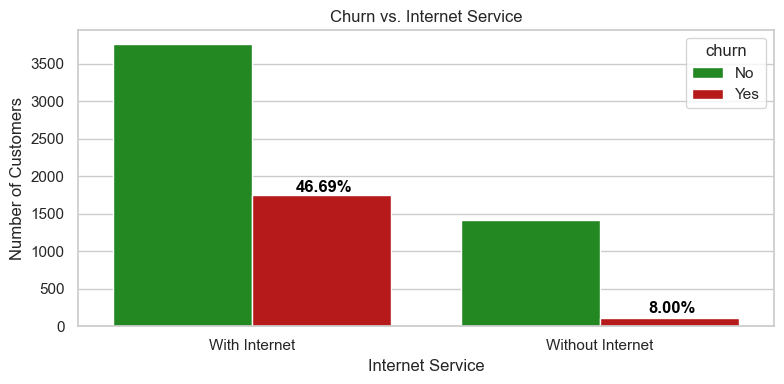

In [9]:

# Chart settings
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Calculate churn ratios for internet service types
churn_ratio_internet_yes = (df[df['internet_service'] == 'Yes']['churn'].value_counts()['Yes'] /
                            df[df['internet_service'] == 'Yes']['churn'].value_counts()['No']) * 100

churn_ratio_internet_no = (df[df['internet_service'] == 'No']['churn'].value_counts()['Yes'] /
                           df[df['internet_service'] == 'No']['churn'].value_counts()['No']) * 100

# Create a bar plot for internet service types and churn rates
ax = sns.countplot(x='internet_service', hue='churn', data=df, palette=["#149911", "#D00000"])

# Set new labels for x-axis
ax.set_xticklabels(['With Internet', 'Without Internet'])

plt.title("Churn vs. Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")

# Annotate the churned columns with the churn ratio
ax.annotate(f"{churn_ratio_internet_yes:.2f}%", xy=(0, churn_ratio_internet_yes), xytext=(52, 92),
            textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

ax.annotate(f"{churn_ratio_internet_no:.2f}%", xy=(1, churn_ratio_internet_no), xytext=(52, 7),
            textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

plt.tight_layout()
plt.show()



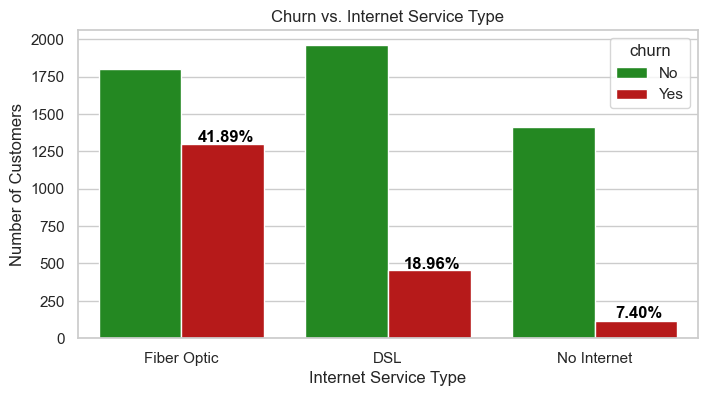

In [73]:

# Calculate churn counts
churn_counts = df['churn'].value_counts()

# Calculate churn ratios for internet service types
churn_ratio_fiber_optic = (df[df['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['Yes'] / 
                           (df[df['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['Yes'] +
                            df[df['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['No'])) * 100

churn_ratio_dsl = (df[df['internet_service_type'] == 'DSL']['churn'].value_counts()['Yes'] /
                   (df[df['internet_service_type'] == 'DSL']['churn'].value_counts()['Yes'] +
                    df[df['internet_service_type'] == 'DSL']['churn'].value_counts()['No'])) * 100

churn_ratio_none = (df[df['internet_service_type'] == 'No internet service']['churn'].value_counts()['Yes'] /
                    (df[df['internet_service_type'] == 'No internet service']['churn'].value_counts()['Yes'] +
                     df[df['internet_service_type'] == 'No internet service']['churn'].value_counts()['No'])) * 100

# Chart settings
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

# Map index values to labels
churn_counts.index = churn_counts.index.map({'Yes': "Churned", 'No': "Non-Churned"})

# Create a bar plot for internet service types and churn rates
ax = sns.countplot(x='internet_service_type', hue='churn', data=df, palette=["#149911", "#D00000"], order=['Fiber optic', 'DSL', 'No internet service'])

# Set new labels for x-axis
ax.set_xticklabels(['Fiber Optic', 'DSL', 'No Internet'])

plt.title("Churn vs. Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")

# Annotate the churned columns with the churn ratio
ax.annotate(f"{churn_ratio_fiber_optic:.2f}%", xy=(0, churn_ratio_fiber_optic), xytext=(32, 135),
            textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

ax.annotate(f"{churn_ratio_dsl:.2f}%", xy=(1, churn_ratio_dsl), xytext=(32, 46),
            textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

ax.annotate(f"{churn_ratio_none:.2f}%", xy=(2, churn_ratio_none), xytext=(32, 12),
            textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

#plt.tight_layout()
plt.show()

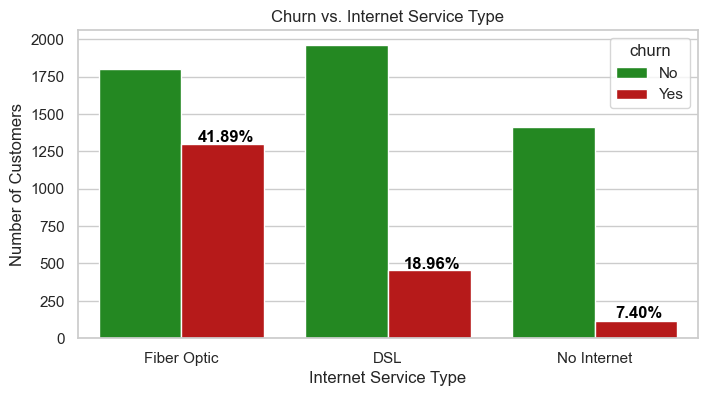

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_churn_by_internet_service(df):
    # Calculate churn ratios for internet service types
    churn_ratio_fiber_optic = (df[df['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['Yes'] / 
                               (df[df['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['Yes'] +
                                df[df['internet_service_type'] == 'Fiber optic']['churn'].value_counts()['No'])) * 100

    churn_ratio_dsl = (df[df['internet_service_type'] == 'DSL']['churn'].value_counts()['Yes'] /
                       (df[df['internet_service_type'] == 'DSL']['churn'].value_counts()['Yes'] +
                        df[df['internet_service_type'] == 'DSL']['churn'].value_counts()['No'])) * 100

    churn_ratio_none = (df[df['internet_service_type'] == 'No internet service']['churn'].value_counts()['Yes'] /
                        (df[df['internet_service_type'] == 'No internet service']['churn'].value_counts()['Yes'] +
                         df[df['internet_service_type'] == 'No internet service']['churn'].value_counts()['No'])) * 100

    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 4))

    # Map index values to labels
    churn_counts = df['churn'].value_counts()
    churn_counts.index = churn_counts.index.map({'Yes': "Churned", 'No': "Non-Churned"})

    # Create a bar plot for internet service types and churn rates
    ax = sns.countplot(x='internet_service_type', hue='churn', data=df, palette=["#149911", "#D00000"], order=['Fiber optic', 'DSL', 'No internet service'])

    # Set new labels for x-axis
    ax.set_xticklabels(['Fiber Optic', 'DSL', 'No Internet'])

    plt.title("Churn vs. Internet Service Type")
    plt.xlabel("Internet Service Type")
    plt.ylabel("Number of Customers")

    # Annotate the churned columns with the churn ratio
    ax.annotate(f"{churn_ratio_fiber_optic:.2f}%", xy=(0, churn_ratio_fiber_optic), xytext=(32, 135),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_dsl:.2f}%", xy=(1, churn_ratio_dsl), xytext=(32, 46),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_none:.2f}%", xy=(2, churn_ratio_none), xytext=(32, 12),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    plt.show()

# Call the function to create the churn distribution by internet service type visualization
plot_churn_by_internet_service(df)


In [11]:
    ct = pd.crosstab(df.churn, df.internet_service_type)
    ct

internet_service_type,DSL,Fiber optic,No internet service
churn,,,
No,1962,1799,1413
Yes,459,1297,113


In [12]:
def chi2_internet_service(df):

    ct = pd.crosstab(df.churn, df.internet_service_type)
    
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    
    print("Chi-Squared Value:", chi2)
    print("P-value:", format(p, '.4f'))

In [13]:

def plot_churn_vs_payment_method(df):
    # Calculate churn counts
    churn_counts = df['churn'].value_counts()

    # Calculate churn ratios for payment methods
    churn_ratio_mailed_check = (df[df['payment_method'] == 'Mailed check']['churn'].value_counts()['Yes'] / df[df['payment_method'] == 'Mailed check']['churn'].value_counts()['No']) * 100
    churn_ratio_electronic_check = (df[df['payment_method'] == 'Electronic check']['churn'].value_counts()['Yes'] / df[df['payment_method'] == 'Electronic check']['churn'].value_counts()['No']) * 100
    churn_ratio_credit_card = (df[df['payment_method'] == 'Credit card']['churn'].value_counts()['Yes'] / df[df['payment_method'] == 'Credit card']['churn'].value_counts()['No']) * 100
    churn_ratio_bank_transfer = (df[df['payment_method'] == 'Bank transfer']['churn'].value_counts()['Yes'] / df[df['payment_method'] == 'Bank transfer']['churn'].value_counts()['No']) * 100

    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 4))

    # Map index values to labels
    churn_counts.index = churn_counts.index.map({'Yes': "Churned", 'No': "Non-Churned"})

    # Create a bar plot for payment methods and churn rates
    ax = sns.countplot(x='payment_method', hue='churn', data=df, palette=["#149911", "#D00000"], order=['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'])

    # Set new labels for x-axis
    ax.set_xticklabels(['Electronic check', 'Mailed check', 'Credit card', 'Bank transfer'])

    plt.title("Churn vs Payment Method")
    plt.xlabel("Payment Method")
    plt.ylabel("Number of Customers")

    # Annotate the churned columns with the churn ratio
    
    ax.annotate(f"{churn_ratio_electronic_check:.2f}%", xy=(0, churn_ratio_electronic_check), xytext=(28, 160),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_mailed_check:.2f}%", xy=(1, churn_ratio_mailed_check), xytext=(28, 46),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_credit_card:.2f}%", xy=(2, churn_ratio_credit_card), xytext=(28, 34),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    ax.annotate(f"{churn_ratio_bank_transfer:.2f}%", xy=(3, churn_ratio_bank_transfer), xytext=(28, 38),
                textcoords="offset points", ha='center', va='bottom', color='black', weight='bold')

    #plt.tight_layout()
    plt.show()




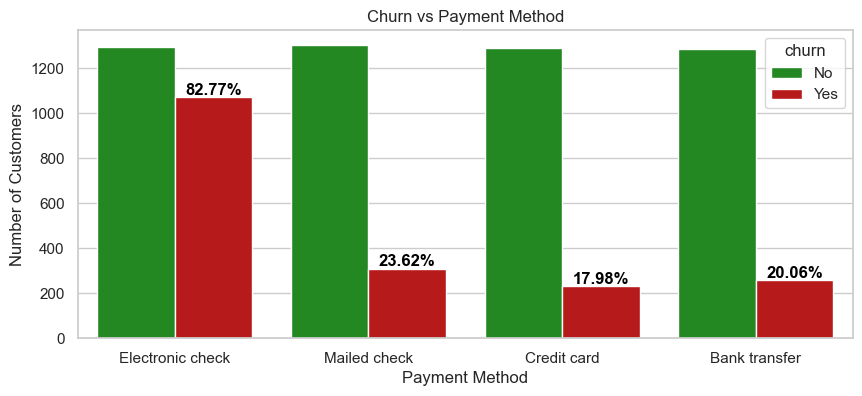

In [14]:
plot_churn_vs_payment_method(df)

In [15]:
ct = pd.crosstab(df.churn, df.payment_method)

chi2, p, dof, expected = stats.chi2_contingency(ct)

print("Chi-Squared Value:", chi2)
print("P-value:", format(p, '.4f'))

Chi-Squared Value: 648.1423274814
P-value: 0.0000


In [16]:
ct

payment_method,Bank transfer,Credit card,Electronic check,Mailed check
churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


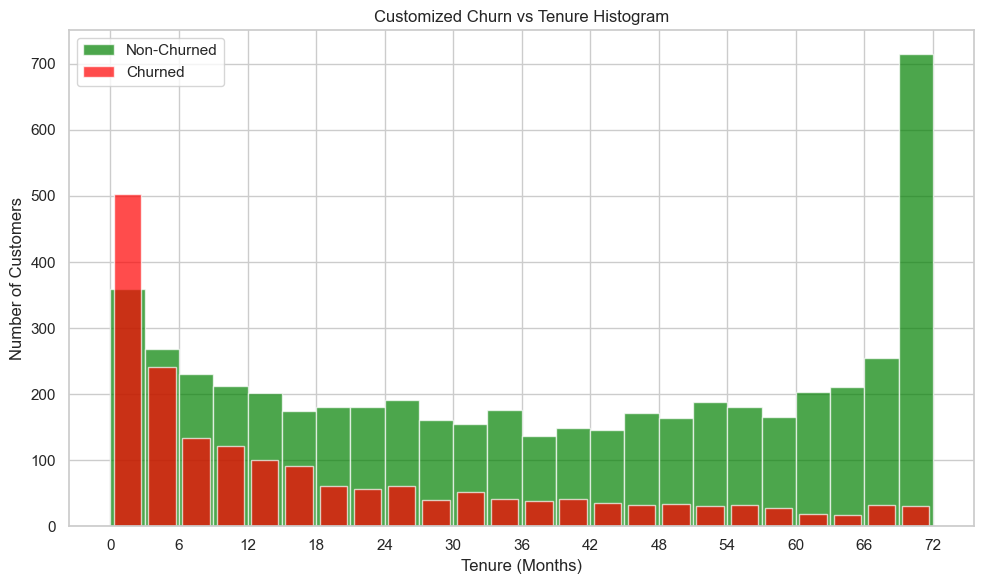

In [17]:
# Do not use this plot, its centered and nof align to the left

def plot_customized_churn_vs_tenure_histogram(df):
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Calculate the number of churned and non-churned customers for each tenure
    churned_tenure = df[df['churn'] == 'Yes']['tenure']
    non_churned_tenure = df[df['churn'] == 'No']['tenure']

    # Create histograms for churn vs tenure with customized settings
    plt.hist(non_churned_tenure, bins=range(0, 74, 3), rwidth=1, color='green', alpha=0.7, label='Non-Churned')
    plt.hist(churned_tenure, bins=range(0, 74, 3), rwidth=0.8, color='red', alpha=0.7, label='Churned')

    plt.title("Customized Churn vs Tenure Histogram")
    plt.xlabel("Tenure (Months)")
    plt.ylabel("Number of Customers")
    plt.legend()

    # Set x-axis tick marks every 6 months
    plt.xticks(range(0, 74, 6))

    plt.tight_layout()
    plt.show()

# Usage example
# Assuming df is your DataFrame
plot_customized_churn_vs_tenure_histogram(df)


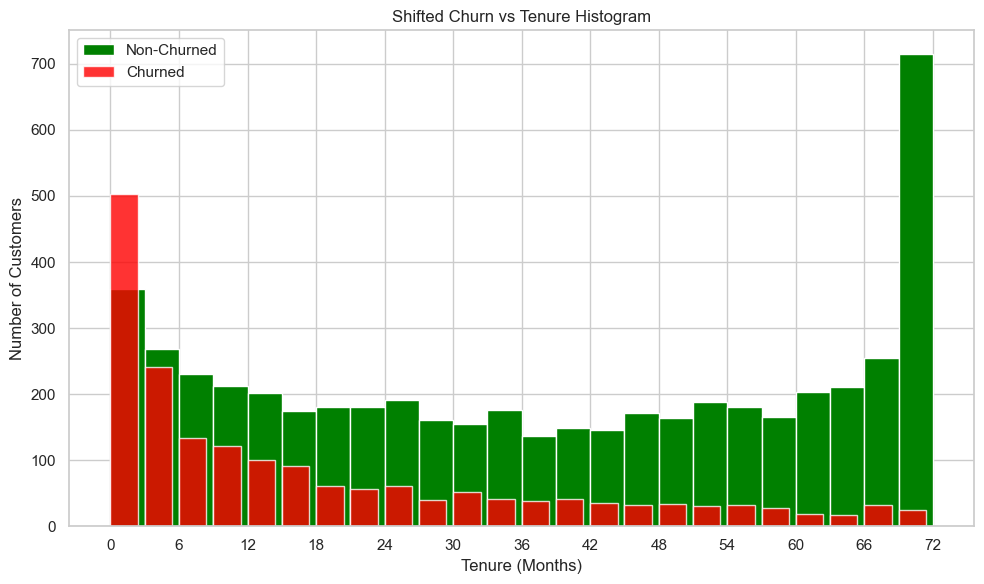

In [19]:
def plot_churn_vs_tenure_histogram(df):
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Calculate the number of churned and non-churned customers for each tenure
    churned_tenure = df[df['churn'] == 'Yes']['tenure']
    non_churned_tenure = df[df['churn'] == 'No']['tenure']

    # Create histogram for non-churned customers
    plt.hist(non_churned_tenure, bins=range(0, 74, 3), rwidth=1, color='green', label='Non-Churned')

    # Define custom data range to shift the churned histogram to the left
    custom_range = [x - 0.3 for x in range(0, 74, 3)]
    plt.hist(churned_tenure, bins=custom_range, rwidth=0.8, color='red', alpha=0.8, label='Churned')

    plt.title("Shifted Churn vs Tenure Histogram")
    plt.xlabel("Tenure (Months)")
    plt.ylabel("Number of Customers")
    plt.legend()

    # Set x-axis tick marks every 6 months
    plt.xticks(range(0, 74, 6))

    plt.tight_layout()
    plt.show()

# Usage example
# Assuming df is your DataFrame
plot_churn_vs_tenure_histogram(df)


In [24]:
def ttest_churn_vs_tenure(df):
    churned_tenure = df[df['churn'] == 'Yes']['tenure']
    non_churned_tenure = df[df['churn'] == 'No']['tenure']

    t_statistic, p_value = stats.ttest_ind(churned_tenure, non_churned_tenure)

    print("T-Statistic:", t_statistic)
    print("P-Value:", p_value)

    if p_value < 0.05:
        print("The difference in tenure between churned and non-churned customers is statistically significant.")
    else:
        print("There is no statistically significant difference in tenure between churned and non-churned customers.")


# Usage example
# Assuming df is your DataFrame
ttest_churn_vs_tenure(df)

T-Statistic: -31.579550511353766
P-Value: 7.99905796059022e-205
The difference in tenure between churned and non-churned customers is statistically significant.


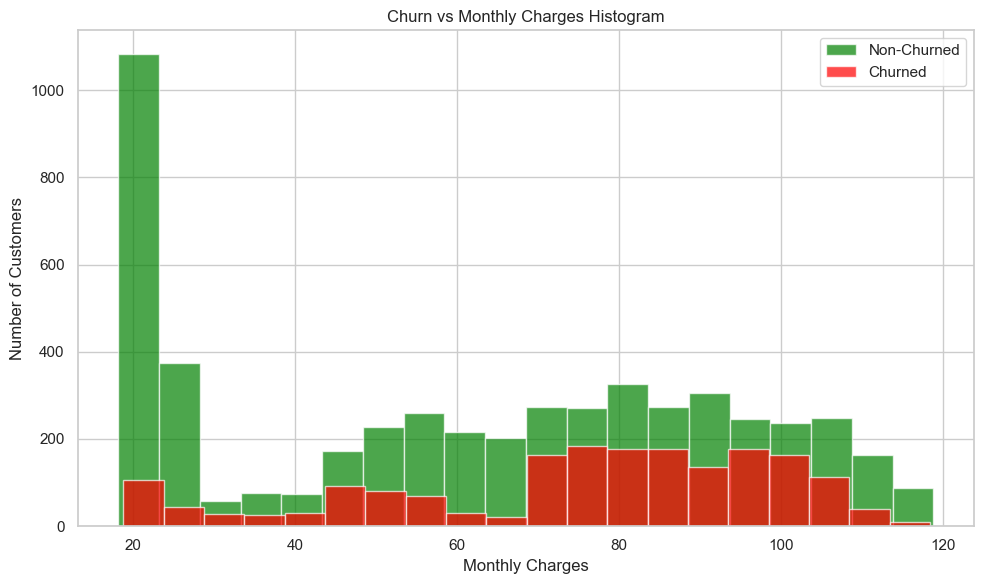

In [25]:

def plot_basic_churn_vs_monthly_charges_histogram(df):
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Create histograms for churn vs monthly charges
    plt.hist(df[df['churn'] == 'No']['monthly_charges'], bins=20, color='green', alpha=0.7, label='Non-Churned')
    plt.hist(df[df['churn'] == 'Yes']['monthly_charges'], bins=20, color='red', alpha=0.7, label='Churned')

    plt.title("Churn vs Monthly Charges Histogram")
    plt.xlabel("Monthly Charges")
    plt.ylabel("Number of Customers")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage example
# Assuming df is your DataFrame
plot_basic_churn_vs_monthly_charges_histogram(df)


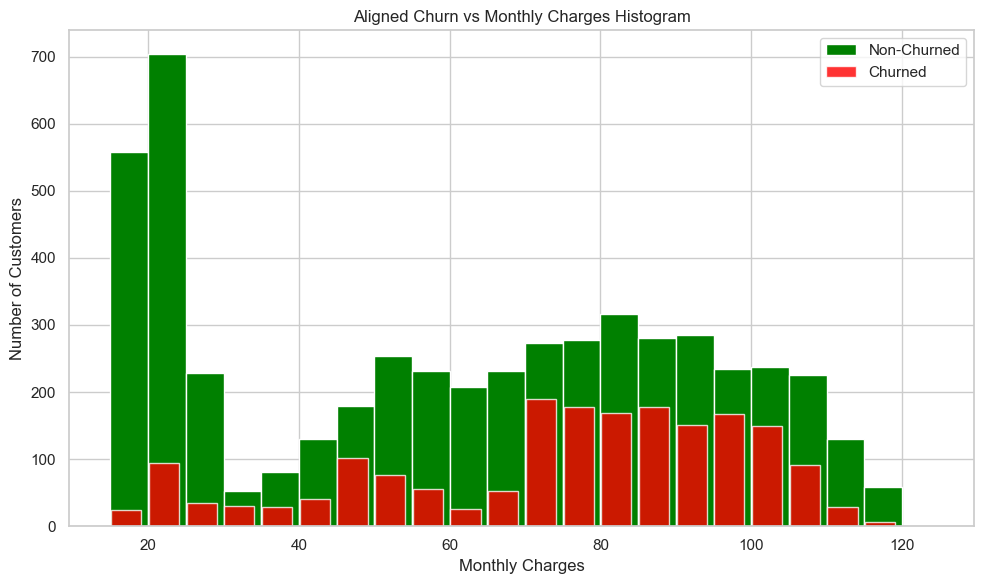

In [26]:
def plot_churn_vs_monthly_charges_histogram(df):
    # Chart settings
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Calculate the common bin edges for both datasets
    #bin_edges = range(15, 125, 5)  # Define bin edges

    # Create histograms for churn vs monthly charges with shared bins
    plt.hist(df[df['churn'] == 'No']['monthly_charges'], bins=range(15, 125, 5) , color='green', alpha=1, label='Non-Churned')
    
    custom_range = [x - 0.4 for x in range(15, 130, 5)]
    plt.hist(df[df['churn'] == 'Yes']['monthly_charges'], bins=custom_range, rwidth=0.8, color='red', alpha=0.8, label='Churned')

    plt.title("Aligned Churn vs Monthly Charges Histogram")
    plt.xlabel("Monthly Charges")
    plt.ylabel("Number of Customers")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage example
# Assuming df is your DataFrame
plot_churn_vs_monthly_charges_histogram(df)


In [30]:

def ttest_monthly_charges(df):
    churned_charges = df[df['churn'] == 'Yes']['monthly_charges']
    non_churned_charges = df[df['churn'] == 'No']['monthly_charges']

    # Perform one-tailed t-test
    t_statistic, p_value = stats.ttest_ind(churned_charges, non_churned_charges, alternative='greater')

    print("One-tailed t-test results:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    if p_value < 0.05:
        print("There is a significant positive correlation between higher monthly charges and churned customers.")
    else:
        print(" There is no significant correlation between higher monthly charges and churned customers.")

# Usage example
# Assuming df is your DataFrame
ttest_monthly_charges(df)


One-tailed t-test results:
T-statistic: 16.536738015936308
P-value: 1.3533228034442077e-60
There is a significant positive correlation between higher monthly charges and churned customers.
